# **Problem Statement: Concrete Strength Prediction**

## **Objective**

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

## **Resources Available**

The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

 

## **Attribute Information:**

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

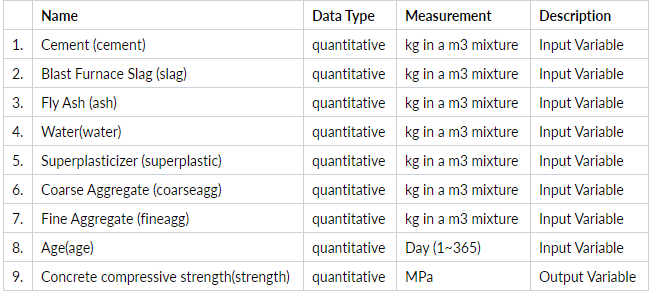


## **Data Loading and Imports**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score,adjusted_rand_score,mean_absolute_error
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from pprint import pprint

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


## **Exploratory Data Analysis**

In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [7]:
df.isnull().values.any() # If there are any null values in data set

False

In [8]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no missing values in this dataset

In [9]:
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [10]:
df.skew()

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

Cement, slag, ash, superplastic and strength are slightly skewed. Age seems to be the most skewed feature in this dataset.

### Univariate

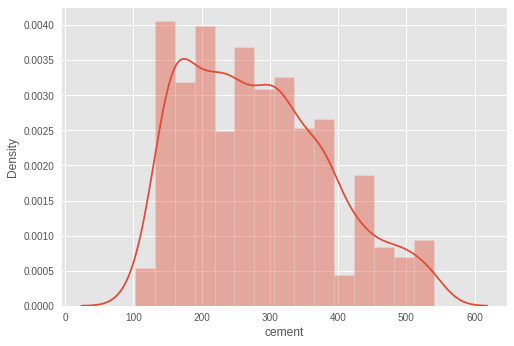

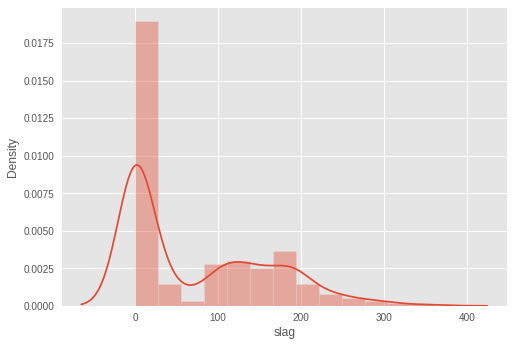

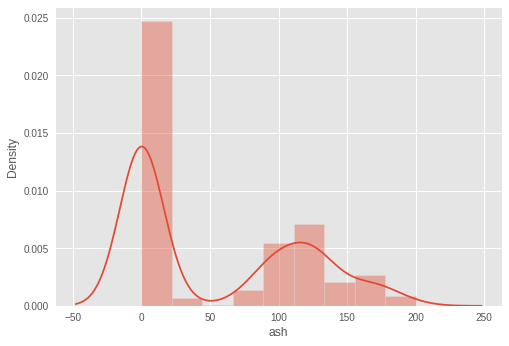

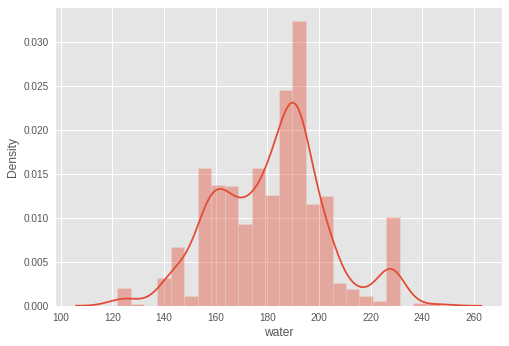

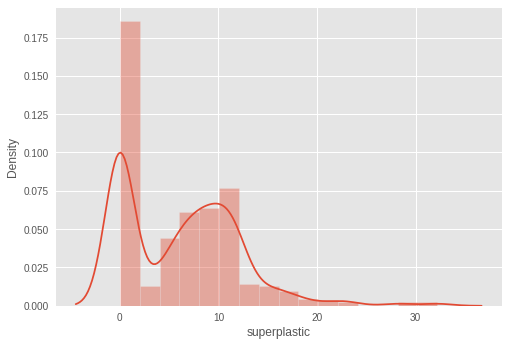

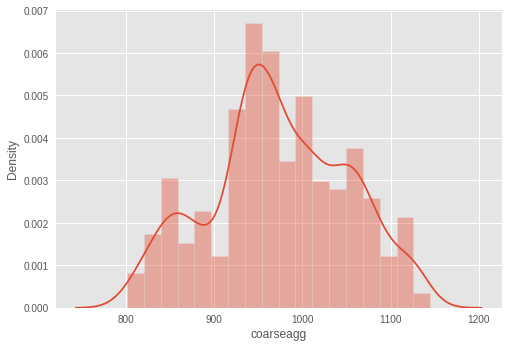

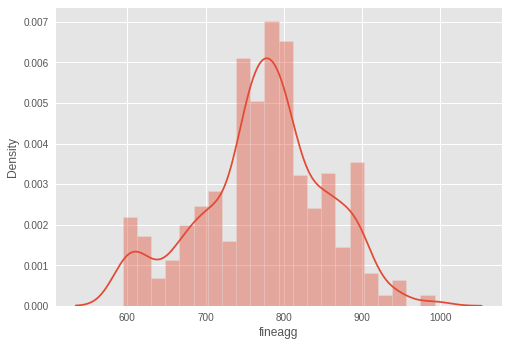

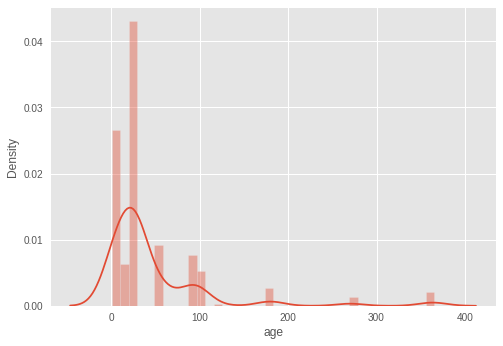

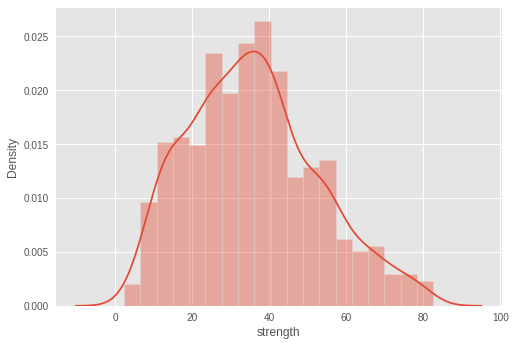

In [11]:
# distplot for continous columns
for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']:
    sns.distplot(df[i])
    plt.show()

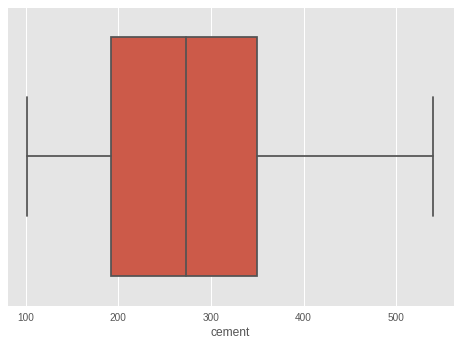

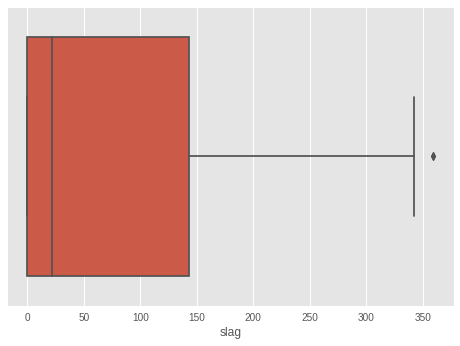

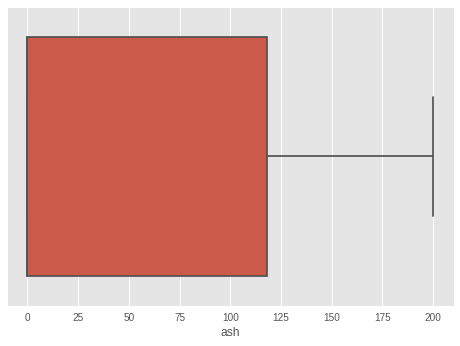

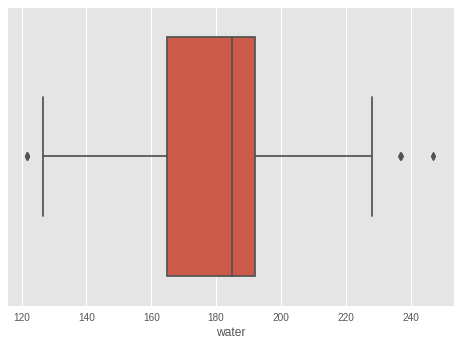

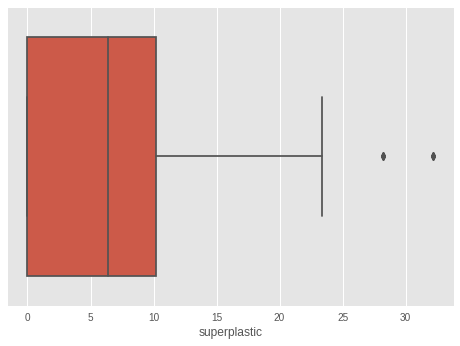

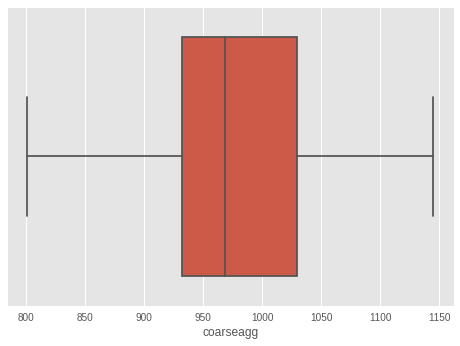

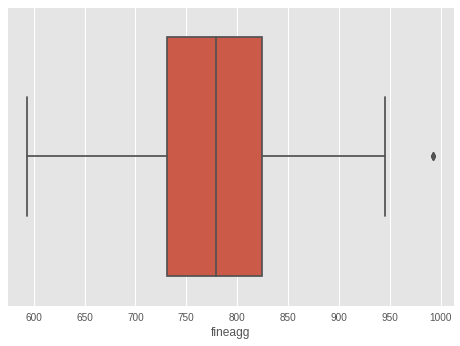

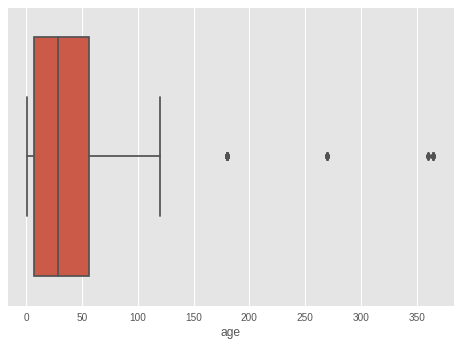

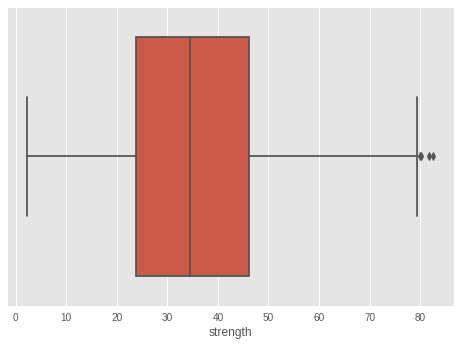

In [12]:
for column in df:
    plt.figure()
    sns.boxplot(x=df[column])

We normalize our dataset using Standard scaler.

In [13]:
# Get column names first
columnname = df.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=columnname)
scaled_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.34,1.60,-0.85,1.03,-1.04,-0.01,-0.31,-0.28,-0.36
1,-1.07,-0.37,1.10,-1.09,0.77,1.39,0.28,-0.50,-0.74
2,-0.30,-0.86,0.65,0.27,-0.12,-0.21,1.09,-0.28,-0.40
3,-0.15,0.47,-0.85,2.18,-1.04,-0.53,-1.29,-0.28,0.60
4,-1.21,1.27,-0.85,0.55,0.48,0.96,-0.96,-0.28,-1.05


Let's look at the normalized distrbution on boxplots for each features

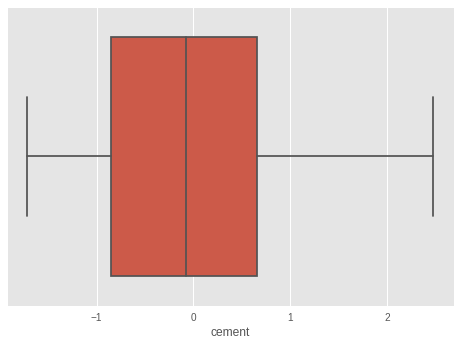

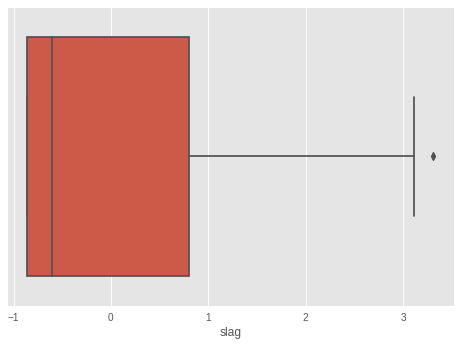

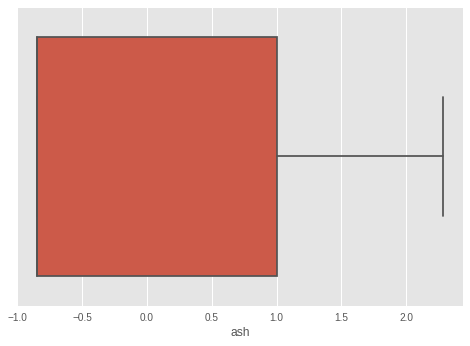

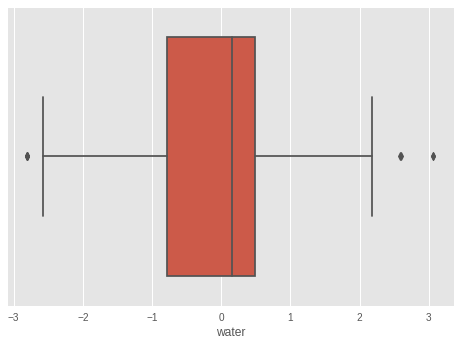

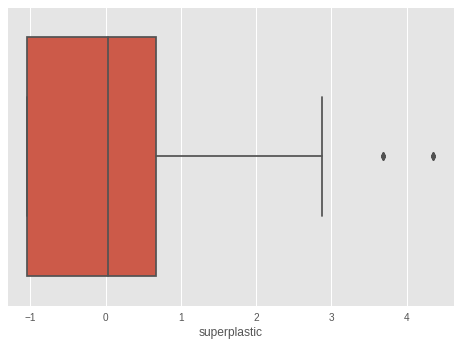

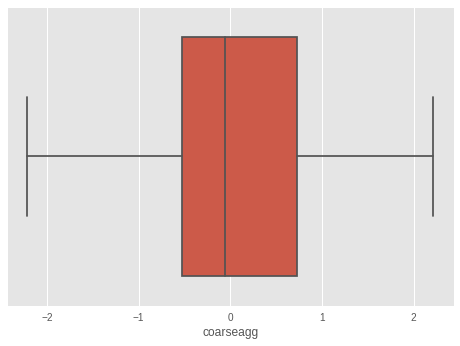

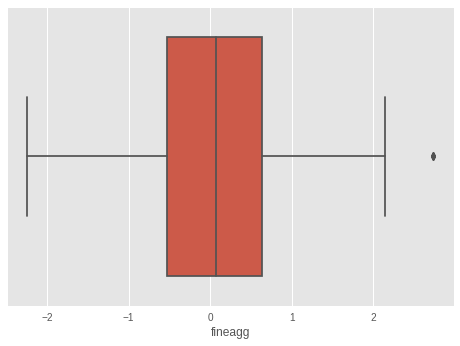

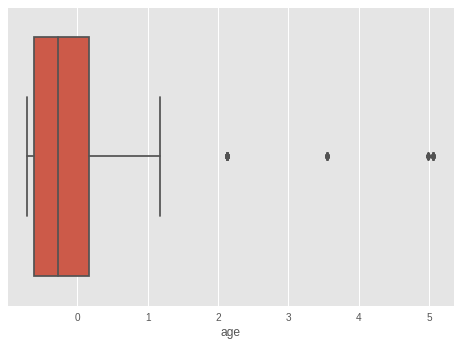

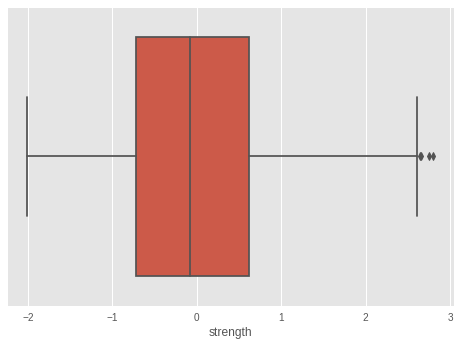

In [14]:
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

In [15]:
filter =scaled_df['age'].values>1.5
df_outlier_slag=scaled_df[filter]
df_outlier_slag.shape

(59, 9)

We can see here that age has 59 values higher than 1.5. This is largenumber coapred to the total of 1030 values in the dataset. We cannot simply remove that high number of values. We suggest replacing outliers by median values.

In [16]:
for col_name in scaled_df.columns[:-1]:
    q1 = scaled_df[col_name].quantile(0.25)
    q3 = scaled_df[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    scaled_df.loc[(scaled_df[col_name] < low) | (scaled_df[col_name] > high), col_name] = scaled_df[col_name].median()

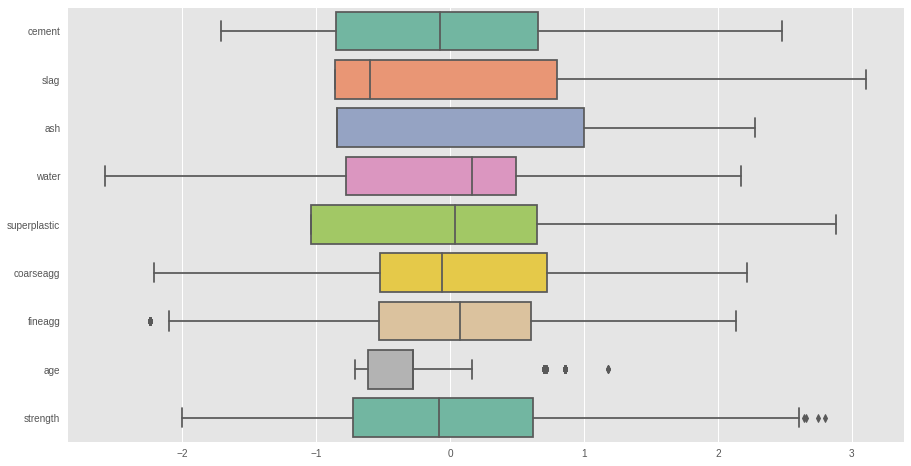

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(data=scaled_df, orient="h", palette="Set2", dodge=False)

In [18]:
scaled_df.shape

(1030, 9)

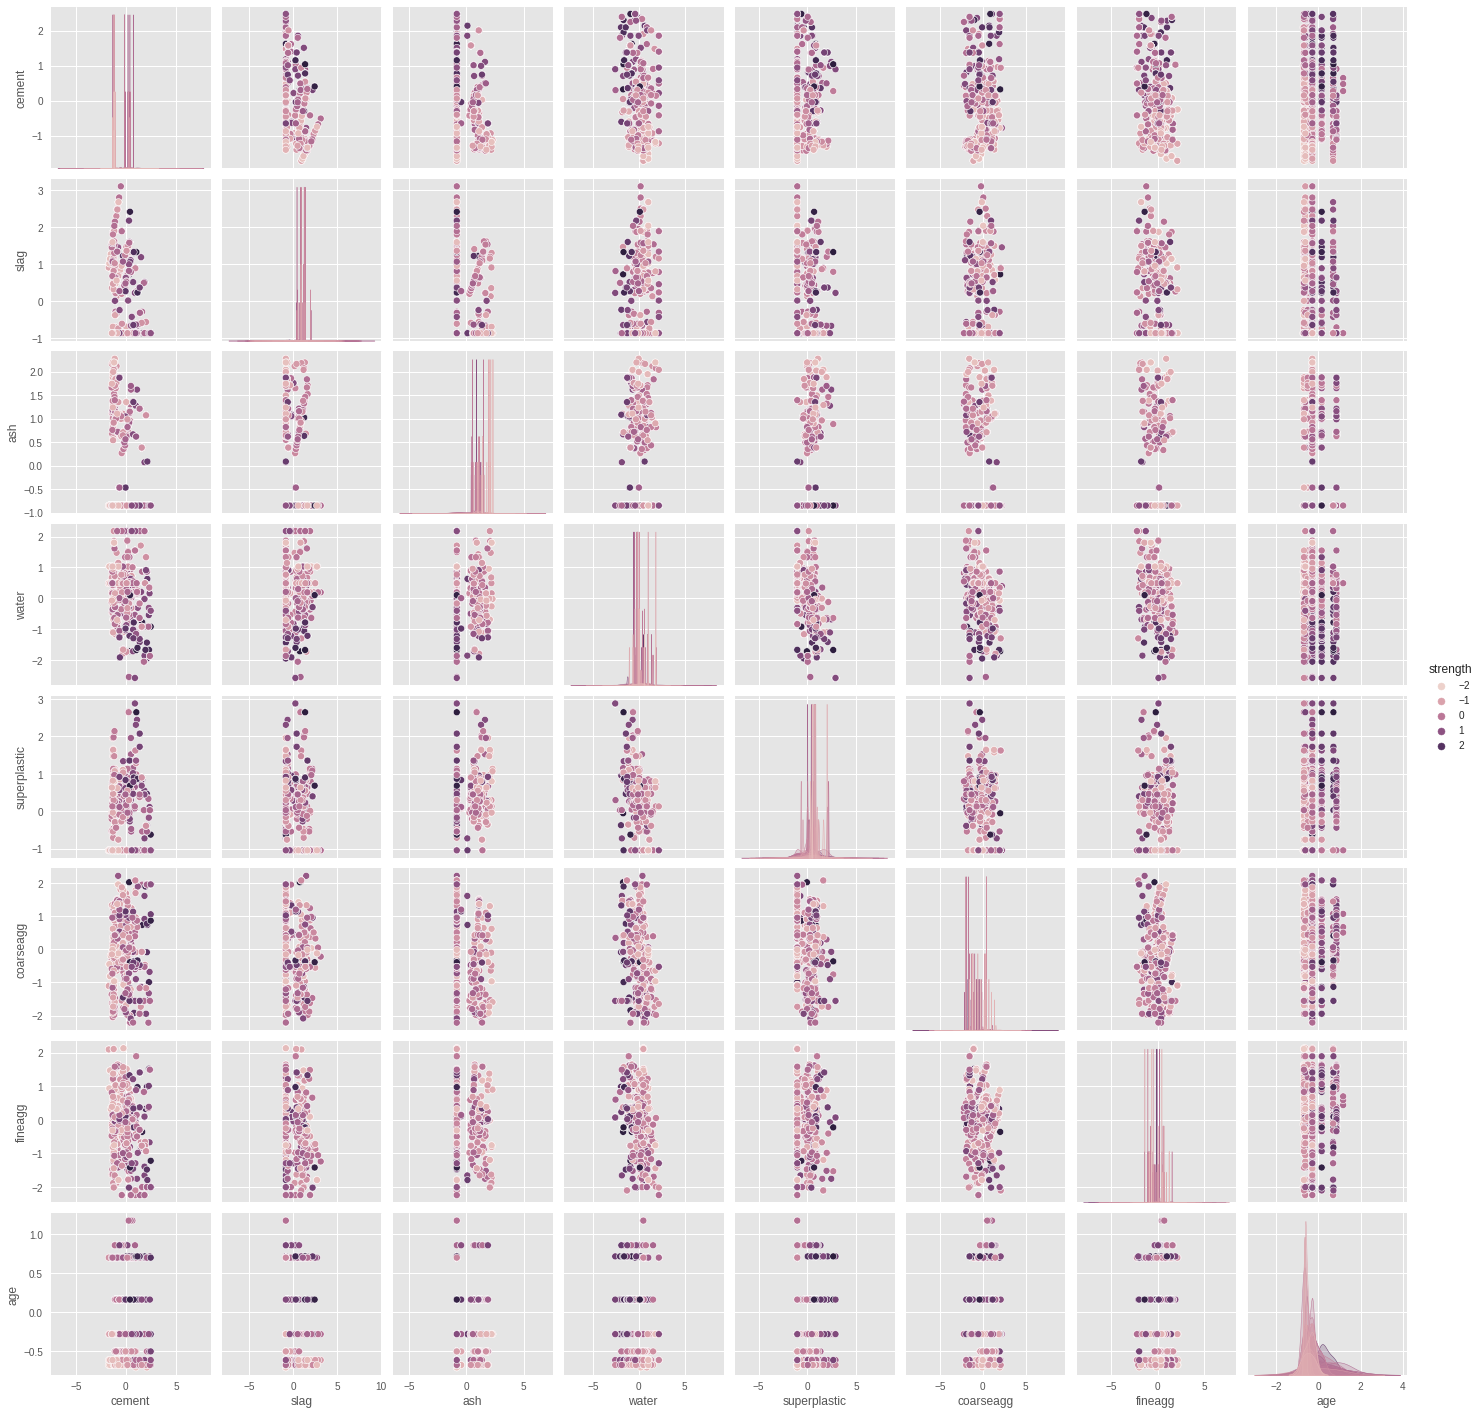

In [19]:
sns.pairplot(scaled_df,hue='strength')

### Bivariate 

In [20]:
# correlation matrix 
cor=scaled_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.28,-0.40,-0.09,0.01,-0.11,-0.24,-0.03,0.50
slag,-0.28,1.00,-0.32,0.10,0.06,-0.28,-0.28,-0.03,0.14
ash,-0.40,-0.32,1.00,-0.25,0.45,-0.01,0.09,0.06,-0.11
water,-0.09,0.10,-0.25,1.00,-0.66,-0.16,-0.43,-0.04,-0.31
superplastic,0.01,0.06,0.45,-0.66,1.00,-0.22,0.16,0.06,0.35
coarseagg,-0.11,-0.28,-0.01,-0.16,-0.22,1.00,-0.16,0.02,-0.16
fineagg,-0.24,-0.28,0.09,-0.43,0.16,-0.16,1.00,0.05,-0.18
age,-0.03,-0.03,0.06,-0.04,0.06,0.02,0.05,1.00,0.50
strength,0.50,0.14,-0.11,-0.31,0.35,-0.16,-0.18,0.50,1.00


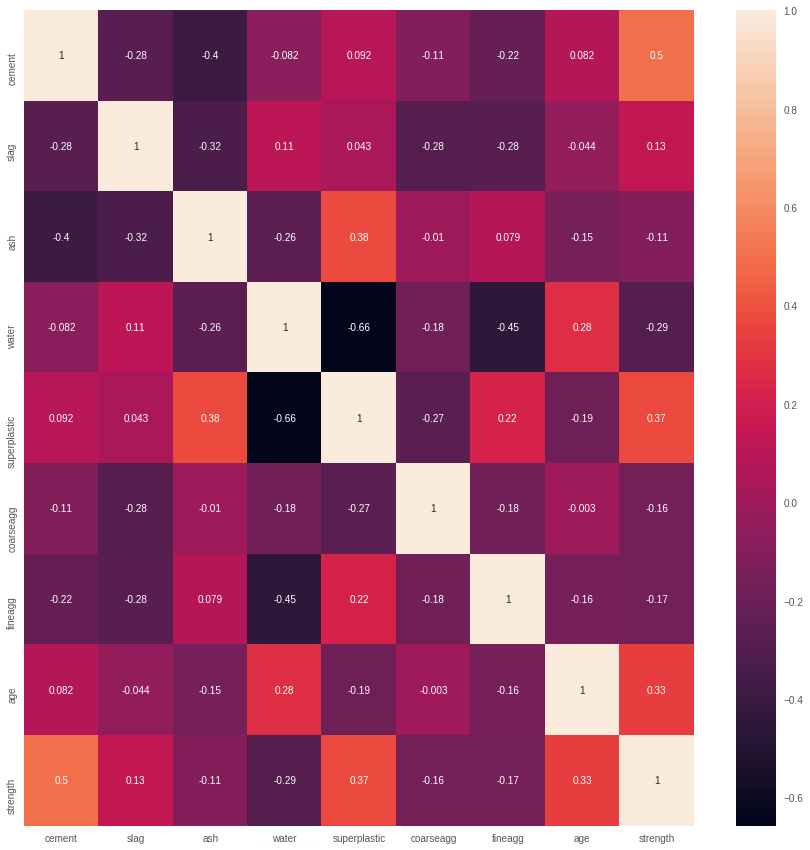

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

We can observe from the  heatmap that there is strong correlation between cement and strengh and also relatively good correlation between superplastic and age to strength. 

## **Training, Cross Validation & Testing Split Data**

In [22]:
y_set = scaled_df[['strength']]
X_set = scaled_df.drop(labels= "strength" , axis = 1)

# data spliting using 80:20 train test data ratio and randon seeding 7
X_model_train, X_test, y_model_train, y_test = train_test_split(X_set, y_set, test_size=0.20, random_state=7)

In [23]:
print('---------------------- Data----------------------------- \n')
print('x train data {}'.format(X_model_train.shape))
print('y train data {}'.format(y_model_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

---------------------- Data----------------------------- 

x train data (824, 8)
y train data (824, 1)
x test data  (206, 8)
y test data  (206, 1)


In [24]:
# data spliting using 70:30 train test data ratio and randon seeding 7
X_train, X_validate, y_train, y_validate = train_test_split(X_model_train, y_model_train, test_size=0.30, random_state=7)

In [25]:
print('---------------------- Data----------------------------- \n')
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_validate.shape))
print('y test data  {}'.format(y_validate.shape))

---------------------- Data----------------------------- 

x train data (576, 8)
y train data (576, 1)
x test data  (248, 8)
y test data  (248, 1)


## **Model Building**


### **K-Fold**

In [26]:
# Defining the kFold function for the cross validation
n_split = 10
random_state = 7
kfold = KFold(n_split, random_state = random_state)


### **Linear Regression**

In [27]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
# coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

lr_train_score = regression_model.score(X_train, y_train)
print("Linear Regression Model Score:",lr_train_score)

lr_validation_score = regression_model.score(X_validate, y_validate)
print("Linear Regression Model Score:",lr_validation_score)

lr_rmse = np.sqrt((-1) * cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Linear Regression Model RMSE :", lr_rmse)

lr_r2 = cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Linear Regression Model R-Square Value :",lr_r2)

lr_model_df = pd.DataFrame({'Model':'Linear Regression',
                            'Training Score':[lr_train_score],
                               'Validation Score': [lr_validation_score],
                           'RMSE': [lr_rmse],
                           'R Squared': [lr_r2]})
lr_model_df

The coefficient for cement is 0.618809714946655
The coefficient for slag is 0.36394565498740683
The coefficient for ash is 0.1288258750821096
The coefficient for water is -0.22061028418914286
The coefficient for superplastic is 0.09459037465537304
The coefficient for coarseagg is -0.01271763648878687
The coefficient for fineagg is -0.0783414124392231
The coefficient for age is 1.1443590756310011
The intercept for our model is 0.2462627339481141
Linear Regression Model Score: 0.6994853387876909
Linear Regression Model Score: 0.7251973195149257
Linear Regression Model RMSE : 0.5631952952299506
Linear Regression Model R-Square Value : 0.6882393635308375


,Model,Training Score,Validation Score,RMSE,R Squared
0,Linear Regression,0.70,0.73,0.56,0.69


### **2nd Degree Polynomial**

In [28]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly.fit_transform(X_train,y_train)
print("Shape", X_train.shape)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_validate)
poly_clf = LinearRegression()

poly_clf.fit(X_train_, y_train)

pf_train_score = poly_clf.score(X_train_, y_train)
print("Random Forest Regressor Model Training Set Score:",pf_train_score)

pf_validation_score = poly_clf.score(X_test_, y_validate)
print("2D Polynomial Model Score:",pf_validation_score)

pf_rmse = np.sqrt((-1) * cross_val_score(poly_clf, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("2D Polynomial Model RMSE :", pf_rmse)

pf_r2 = cross_val_score(poly_clf, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("2D Polynomial Model R-Square Value :", pf_r2)

pf_model_df = pd.DataFrame({'Model':'Polynomial 2D',
                            'Training Score':[pf_train_score],
                               'Validation Score': [pf_validation_score],
                           'RMSE': [pf_rmse],
                           'R Squared': [pf_r2]})
pf_model_df

Shape (576, 8)
Random Forest Regressor Model Training Set Score: 0.7624968752583949
2D Polynomial Model Score: 0.791057469912569
2D Polynomial Model RMSE : 0.5439333216302695
2D Polynomial Model R-Square Value : 0.7075590955482245


,Model,Training Score,Validation Score,RMSE,R Squared
0,Polynomial 2D,0.76,0.79,0.54,0.71


### **3rd Degree Polynomial**

In [29]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X_train,y_train)
print("Shape", X_train.shape)
X_train__ = poly.fit_transform(X_train)
X_test__ = poly.fit_transform(X_validate)

poly_clf_3d = LinearRegression()

poly_clf_3d.fit(X_train__, y_train)

pf3_train_score = poly_clf_3d.score(X_train__, y_train)
print("Random Forest Regressor Model Training Set Score:",pf3_train_score)

pf3_validation_score = poly_clf_3d.score(X_test__, y_validate)
print("2D Polynomial Model Score:",pf3_validation_score)

pf3_rmse = np.sqrt((-1) * cross_val_score(poly_clf_3d, X_train__, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("2D Polynomial Model RMSE :", pf3_rmse)

pf3_r2 = cross_val_score(poly_clf_3d, X_train__, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("2D Polynomial Model R-Square Value :", pf3_r2)

pf3_model_df = pd.DataFrame({'Model':'Polynomial 3D',
                            'Training Score':[pf3_train_score],
                               'Validation Score': [pf3_validation_score],
                           'RMSE': [pf3_rmse],
                           'R Squared': [pf3_r2]})
pf3_model_df

Shape (576, 8)
Random Forest Regressor Model Training Set Score: 0.8318063175165042
2D Polynomial Model Score: 0.7731947822637789
2D Polynomial Model RMSE : 0.6382312411700328
2D Polynomial Model R-Square Value : 0.5900602811099726


,Model,Training Score,Validation Score,RMSE,R Squared
0,Polynomial 3D,0.83,0.77,0.64,0.59


### Conclusion on Linear Models:

In [30]:
pd.concat([lr_model_df,pf_model_df,pf3_model_df])

,Model,Training Score,Validation Score,RMSE,R Squared
0,Linear Regression,0.70,0.73,0.56,0.69
0,Polynomial 2D,0.76,0.79,0.54,0.71
0,Polynomial 3D,0.83,0.77,0.64,0.59


Second degree polynomial seems to perform best amongst three linear regression explored above.
In the next few lines of code we will explore other other modelling options.

### **Random Forest**

In [31]:
rfTree = RandomForestRegressor(n_estimators=100)
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:",rfTree_train_score)


rfTree_validation_score = rfTree.score(X_validate, y_validate)
print("Random Forest Regressor Model Validation Set Score:", rfTree_validation_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_model_df = pd.DataFrame({'Model':'Random Forest',
                               'Training Score': [rfTree_train_score],
                                'Validation Score': [rfTree_validation_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9773467714827531
Random Forest Regressor Model Validation Set Score: 0.8992898538072602
Random Forest Regressor Model RMSE : 0.3764186633785581
Random Forest Regressor Model R-Square Value : 0.8563144023799787


,Model,Training Score,Validation Score,RMSE,R Squared
0,Random Forest,0.98,0.90,0.38,0.86


In [32]:
print("Random Forest Regressor Model Test Data Set Score:")
rfTree_test_score = rfTree.score(X_test, y_test)
print(rfTree_test_score)

Random Forest Regressor Model Test Data Set Score:
0.8851703493269476


### **Gradient Boost**

In [33]:
grabt = GradientBoostingRegressor(random_state=7, n_estimators=100)
grabt.fit(X_train, y_train.values.ravel())
print('Gradient Boost Regressor')
grabt_train_score = grabt.score(X_train, y_train)
print("Gradient Boost Regressor Model Training Set Score:",grabt_train_score)


grabt_validation_score = grabt.score(X_validate, y_validate)
print("Gradient Boost Model Validation Set Score:", grabt_validation_score)

grabt_rmse = np.sqrt((-1) * cross_val_score(grabt, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Gradient Boost Model RMSE :", grabt_rmse)


grabt_r2 = cross_val_score(grabt, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Gradient Boost Model R-Square Value :", grabt_r2)

grabt_model_df = pd.DataFrame({'Model':'Gradient Boost',
                               'Training Score': [grabt_train_score],
                               'Validation Score': [grabt_validation_score],
                           'RMSE': [grabt_rmse],
                           'R Squared': [grabt_r2]})
grabt_model_df

Gradient Boost Regressor
Gradient Boost Regressor Model Training Set Score: 0.9439350150336931
Gradient Boost Model Validation Set Score: 0.9021186840242506
Gradient Boost Model RMSE : 0.37578086250874
Gradient Boost Model R-Square Value : 0.8585228674543485


,Model,Training Score,Validation Score,RMSE,R Squared
0,Gradient Boost,0.94,0.90,0.38,0.86


In [34]:
print("Gradient Boost Regressor Model Test Data Set Score:")
grabt_test_score = grabt.score(X_test, y_test)
print(grabt_test_score)

Gradient Boost Regressor Model Test Data Set Score:
0.9020484884055279


### **Ada Boost**

In [35]:
adabt = AdaBoostRegressor(random_state=7, n_estimators=100)
adabt.fit(X_train, y_train.values.ravel())
print('Ada Boost Regressor')
adabt_train_score = adabt.score(X_train, y_train)
print("Ada Boost Regressor Model Training Set Score:",adabt_train_score)


adabt_validation_score = adabt.score(X_validate, y_validate)
print("Ada Boost Model Validation Set Score:", adabt_validation_score)

adabt_rmse = np.sqrt((-1) * cross_val_score(adabt, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Ada Boost Model RMSE :", adabt_rmse)


adabt_r2 = cross_val_score(adabt, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Ada Boost Model R-Square Value :", adabt_r2)

adabt_model_df = pd.DataFrame({'Model':'Adaboost',
                               'Training Score': [adabt_train_score],
                               'Validation Score': [adabt_validation_score],
                           'RMSE': [adabt_rmse],
                           'R Squared': [adabt_r2]})
adabt_model_df

Ada Boost Regressor
Ada Boost Regressor Model Training Set Score: 0.8133073789799811
Ada Boost Model Validation Set Score: 0.7787762097821586
Ada Boost Model RMSE : 0.49329183636309143
Ada Boost Model R-Square Value : 0.7570114880215015


,Model,Training Score,Validation Score,RMSE,R Squared
0,Adaboost,0.81,0.78,0.49,0.76


### **Bagging**

In [36]:
bagg = BaggingRegressor(random_state=7, n_estimators=100)
bagg.fit(X_train, y_train.values.ravel())
print('Bagging Regressor')
bagg_train_score = bagg.score(X_train, y_train)
print("Bagging Regressor Model Training Set Score:",bagg_train_score)


bagg_validation_score = bagg.score(X_validate, y_validate)
print("Bagging Model Validation Set Score:", bagg_validation_score)

bagg_rmse = np.sqrt((-1) * cross_val_score(bagg, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Bagging Model RMSE :", bagg_rmse)


bagg_r2 = cross_val_score(bagg, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Baggingt Model R-Square Value :", bagg_r2)

bagg_model_df = pd.DataFrame({'Model':'Bagging',
                               'Training Score': [bagg_train_score],
                              'Validation Score': [bagg_validation_score],
                           'RMSE': [bagg_rmse],
                           'R Squared': [bagg_r2]})
bagg_model_df

Bagging Regressor
Bagging Regressor Model Training Set Score: 0.9774937163096499
Bagging Model Validation Set Score: 0.8961498497025503
Bagging Model RMSE : 0.37537132161626696
Baggingt Model R-Square Value : 0.85692245560402


,Model,Training Score,Validation Score,RMSE,R Squared
0,Bagging,0.98,0.90,0.38,0.86


In [37]:
pd.concat([lr_model_df,pf_model_df,pf3_model_df,rfTree_model_df,bagg_model_df, grabt_model_df, adabt_model_df])

,Model,Training Score,Validation Score,RMSE,R Squared
0,Linear Regression,0.70,0.73,0.56,0.69
0,Polynomial 2D,0.76,0.79,0.54,0.71
0,Polynomial 3D,0.83,0.77,0.64,0.59
0,Random Forest,0.98,0.90,0.38,0.86
0,Bagging,0.98,0.90,0.38,0.86
0,Gradient Boost,0.94,0.90,0.38,0.86
0,Adaboost,0.81,0.78,0.49,0.76


Random Forest and Bagging seem to be the models that perform best, both with high training score of 98%, High R squared of 86% and low RMSE around 36-37%. Both have similar cross validation and test score (90% and 97% respectively). Because of slightly better RMSE value obtained with Random Forest, we pick that model to be our model of choice. We will perform hyperparameter tunning on both models to see if we can get better perforamnce that would give a clear performance advantage between Random Forest and Bagging.

## **Hyperparameter Tunning**

### Tunning Random Forest Using Random Search CV

In [38]:
rf = RandomForestRegressor(random_state = 7)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}


In [39]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 3)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 55, 100]}


In [40]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = kfold, verbose=2, random_state=7, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel());

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.6s finished


In [41]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = rf_random.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:",rfTree_train_score)

rfTree_validation_score = rfTree.score(X_validate, y_validate)
print("Random Forest Regressor Model Validation Set Score:",rfTree_validation_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_random_model_df = pd.DataFrame({'Model':'Tuned Random Forrest',
                                       'Training Score': [rfTree_train_score],
                                       'Validation Score': [rfTree_validation_score],
                                       'RMSE': [rfTree_rmse],
                                       'R Squared': [rfTree_r2]})
rfTree_random_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9241543893205361
Random Forest Regressor Model Validation Set Score: 0.8558243790108762
Random Forest Regressor Model RMSE : 0.4161614074187195
Random Forest Regressor Model R-Square Value : 0.8265785850574823


,Model,Training Score,Validation Score,RMSE,R Squared
0,Tuned Random Forrest,0.92,0.86,0.42,0.83


In [42]:
rfTree_test_score = rfTree.score(X_test, y_test)
print("Random Forest Regressor Model Test Data Set Score:", rfTree_test_score)

Random Forest Regressor Model Test Data Set Score: 0.854367260275453


In [43]:
pd.concat([rfTree_model_df, rfTree_random_model_df])

,Model,Training Score,Validation Score,RMSE,R Squared
0,Random Forest,0.98,0.90,0.38,0.86
0,Tuned Random Forrest,0.92,0.86,0.42,0.83


Tunning the model by using random search CV seems to slightly degrade model performance.

### Tunning Gradient Boosting using GridsearchCV

In [44]:
grabt = GradientBoostingRegressor(random_state=7, n_estimators=100)
print('Parameters currently in use:\n')
pprint(grabt.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 7,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [45]:
param_grid = {
    "loss":["ls"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5, 1),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1),
    "max_depth":[3],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

grabt = GradientBoostingRegressor(random_state=7, n_estimators=100)

grid_search = GridSearchCV(estimator = grabt, param_grid = param_grid, 
                          cv = kfold, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel());
grid_search.best_params_

{'criterion': 'mae',
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 10,
 'subsample': 1.0}

In [46]:
#best ensemble model (with optimal combination of hyperparameters)
grabt = grid_search.best_estimator_
grabt.fit(X_train, y_train.values.ravel())
print('Gradient Boost Regressor')
grabt_train_score = grabt.score(X_train, y_train)
print("Gradient Boost Regressor Model Training Set Score:", grabt_train_score)

grabt_validation_score = grabt.score(X_validate, y_validate)
print("Gradient Boost Regressor Model Validation Set Score:",grabt_validation_score)

grabt_rmse = np.sqrt((-1) * cross_val_score(grabt, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Gradient Boost Regressor Model RMSE :", grabt_rmse)

grabt_r2 = cross_val_score(grabt, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Gradient Boost Regressor Model R-Square Value :", grabt_r2)

grabt_grid_model_df = pd.DataFrame({'Model':'Tuned Gradient Boosting',
                                    'Training Score': [grabt_train_score],
                                    'Validation Score': [grabt_validation_score],
                                     'RMSE': [grabt_rmse],
                                     'R Squared': [grabt_r2]})
grabt_grid_model_df


Gradient Boost Regressor
Gradient Boost Regressor Model Training Set Score: 0.5543301093562686
Gradient Boost Regressor Model Validation Set Score: 0.5342777634446951
Gradient Boost Regressor Model RMSE : 0.6956988013336073
Gradient Boost Regressor Model R-Square Value : 0.5209087631711704


,Model,Training Score,Validation Score,RMSE,R Squared
0,Tuned Gradient Boosting,0.55,0.53,0.70,0.52


### **Models Performance Summary**

Models tested prior to tuning:

In [47]:
pd.concat([lr_model_df,pf_model_df,pf3_model_df,rfTree_model_df,bagg_model_df, grabt_model_df, adabt_model_df])

,Model,Training Score,Validation Score,RMSE,R Squared
0,Linear Regression,0.70,0.73,0.56,0.69
0,Polynomial 2D,0.76,0.79,0.54,0.71
0,Polynomial 3D,0.83,0.77,0.64,0.59
0,Random Forest,0.98,0.90,0.38,0.86
0,Bagging,0.98,0.90,0.38,0.86
0,Gradient Boost,0.94,0.90,0.38,0.86
0,Adaboost,0.81,0.78,0.49,0.76


Selected models for hyperparameter tuning:

In [48]:
pd.concat([rfTree_model_df, rfTree_random_model_df,grabt_model_df,grabt_grid_model_df])

,Model,Training Score,Validation Score,RMSE,R Squared
0,Random Forest,0.98,0.90,0.38,0.86
0,Tuned Random Forrest,0.92,0.86,0.42,0.83
0,Gradient Boost,0.94,0.90,0.38,0.86
0,Tuned Gradient Boosting,0.55,0.53,0.70,0.52


## **Conclusion**
From the above work, we have come to the conclusion that Random Forest gives the most suitable model, with best training and cross validation scores.   

We did not see improvement after tunning the model (in fact most metrics seem to degrade). We tested random and grid search CV on each model. Randomsearch CV only slightly reduced model scores on Random Forest but gridsearchCV had a very negative impact on gradient boosting.   

Overall we recommend using Random Forest to model the strength of high performance concrete.